In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('Social_Network_Ads.csv')

In [3]:
# encoding 
df = pd.get_dummies(data=df, columns=['Gender'], drop_first=True)

In [4]:
# split
x = df[['Age', 'EstimatedSalary', 'Gender_Male']]
y = df['Purchased']

In [5]:
# scale the data
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [16]:
model = RandomForestClassifier(criterion='entropy',n_estimators=30) 
model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=30)

In [17]:
# predict and accuracy
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0])

In [18]:
accuracy_score(y_test,y_pred)

0.9

-------

In [20]:
from sklearn.model_selection import GridSearchCV


model = RandomForestClassifier(random_state=42,n_jobs=2)

params = {
    'n_estimators' : [5,10,15,20,30,50,100] , 
    'max_depth' : [2,3,4,5,10,15,20]
 }



grid_search = GridSearchCV(estimator=model , param_grid=params , cv=4 , scoring='accuracy' , n_jobs=-1)

grid_search.fit(x_train,y_train)


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=2, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 10, 15, 20],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 100]},
             scoring='accuracy')

In [21]:
grid_search.best_score_

0.9133333333333333

In [27]:
b = grid_search.best_estimator_
b

RandomForestClassifier(max_depth=3, n_estimators=50, n_jobs=2, random_state=42)

[Text(0.5, 0.875, '[-1.78179743 -1.49004624  1.02020406] <= 0.367\ngini = 0.464\nsamples = 185\nvalue = [190, 110]\nclass = Purchased'),
 Text(0.25, 0.625, '[-0.25358736 -1.46068138  1.02020406] <= 0.595\ngini = 0.247\nsamples = 128\nvalue = [166, 28]\nclass = Purchased'),
 Text(0.125, 0.375, '[-1.11320552 -0.78528968 -0.98019606] <= 0.02\ngini = 0.048\nsamples = 110\nvalue = [159, 4]\nclass = Purchased'),
 Text(0.0625, 0.125, 'gini = 0.023\nsamples = 52\nvalue = [85, 1]\nclass = Purchased'),
 Text(0.1875, 0.125, 'gini = 0.075\nsamples = 58\nvalue = [74, 3]\nclass = Purchased'),
 Text(0.375, 0.375, '[-0.25358736 -1.46068138  1.02020406] <= 1.49\ngini = 0.35\nsamples = 18\nvalue = [7, 24]\nclass = No Purchased'),
 Text(0.3125, 0.125, 'gini = 0.465\nsamples = 10\nvalue = [7, 12]\nclass = No Purchased'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [0, 12]\nclass = No Purchased'),
 Text(0.75, 0.625, '[-1.78179743 -1.49004624  1.02020406] <= 0.845\ngini = 0.35\nsamples = 57\nvalu

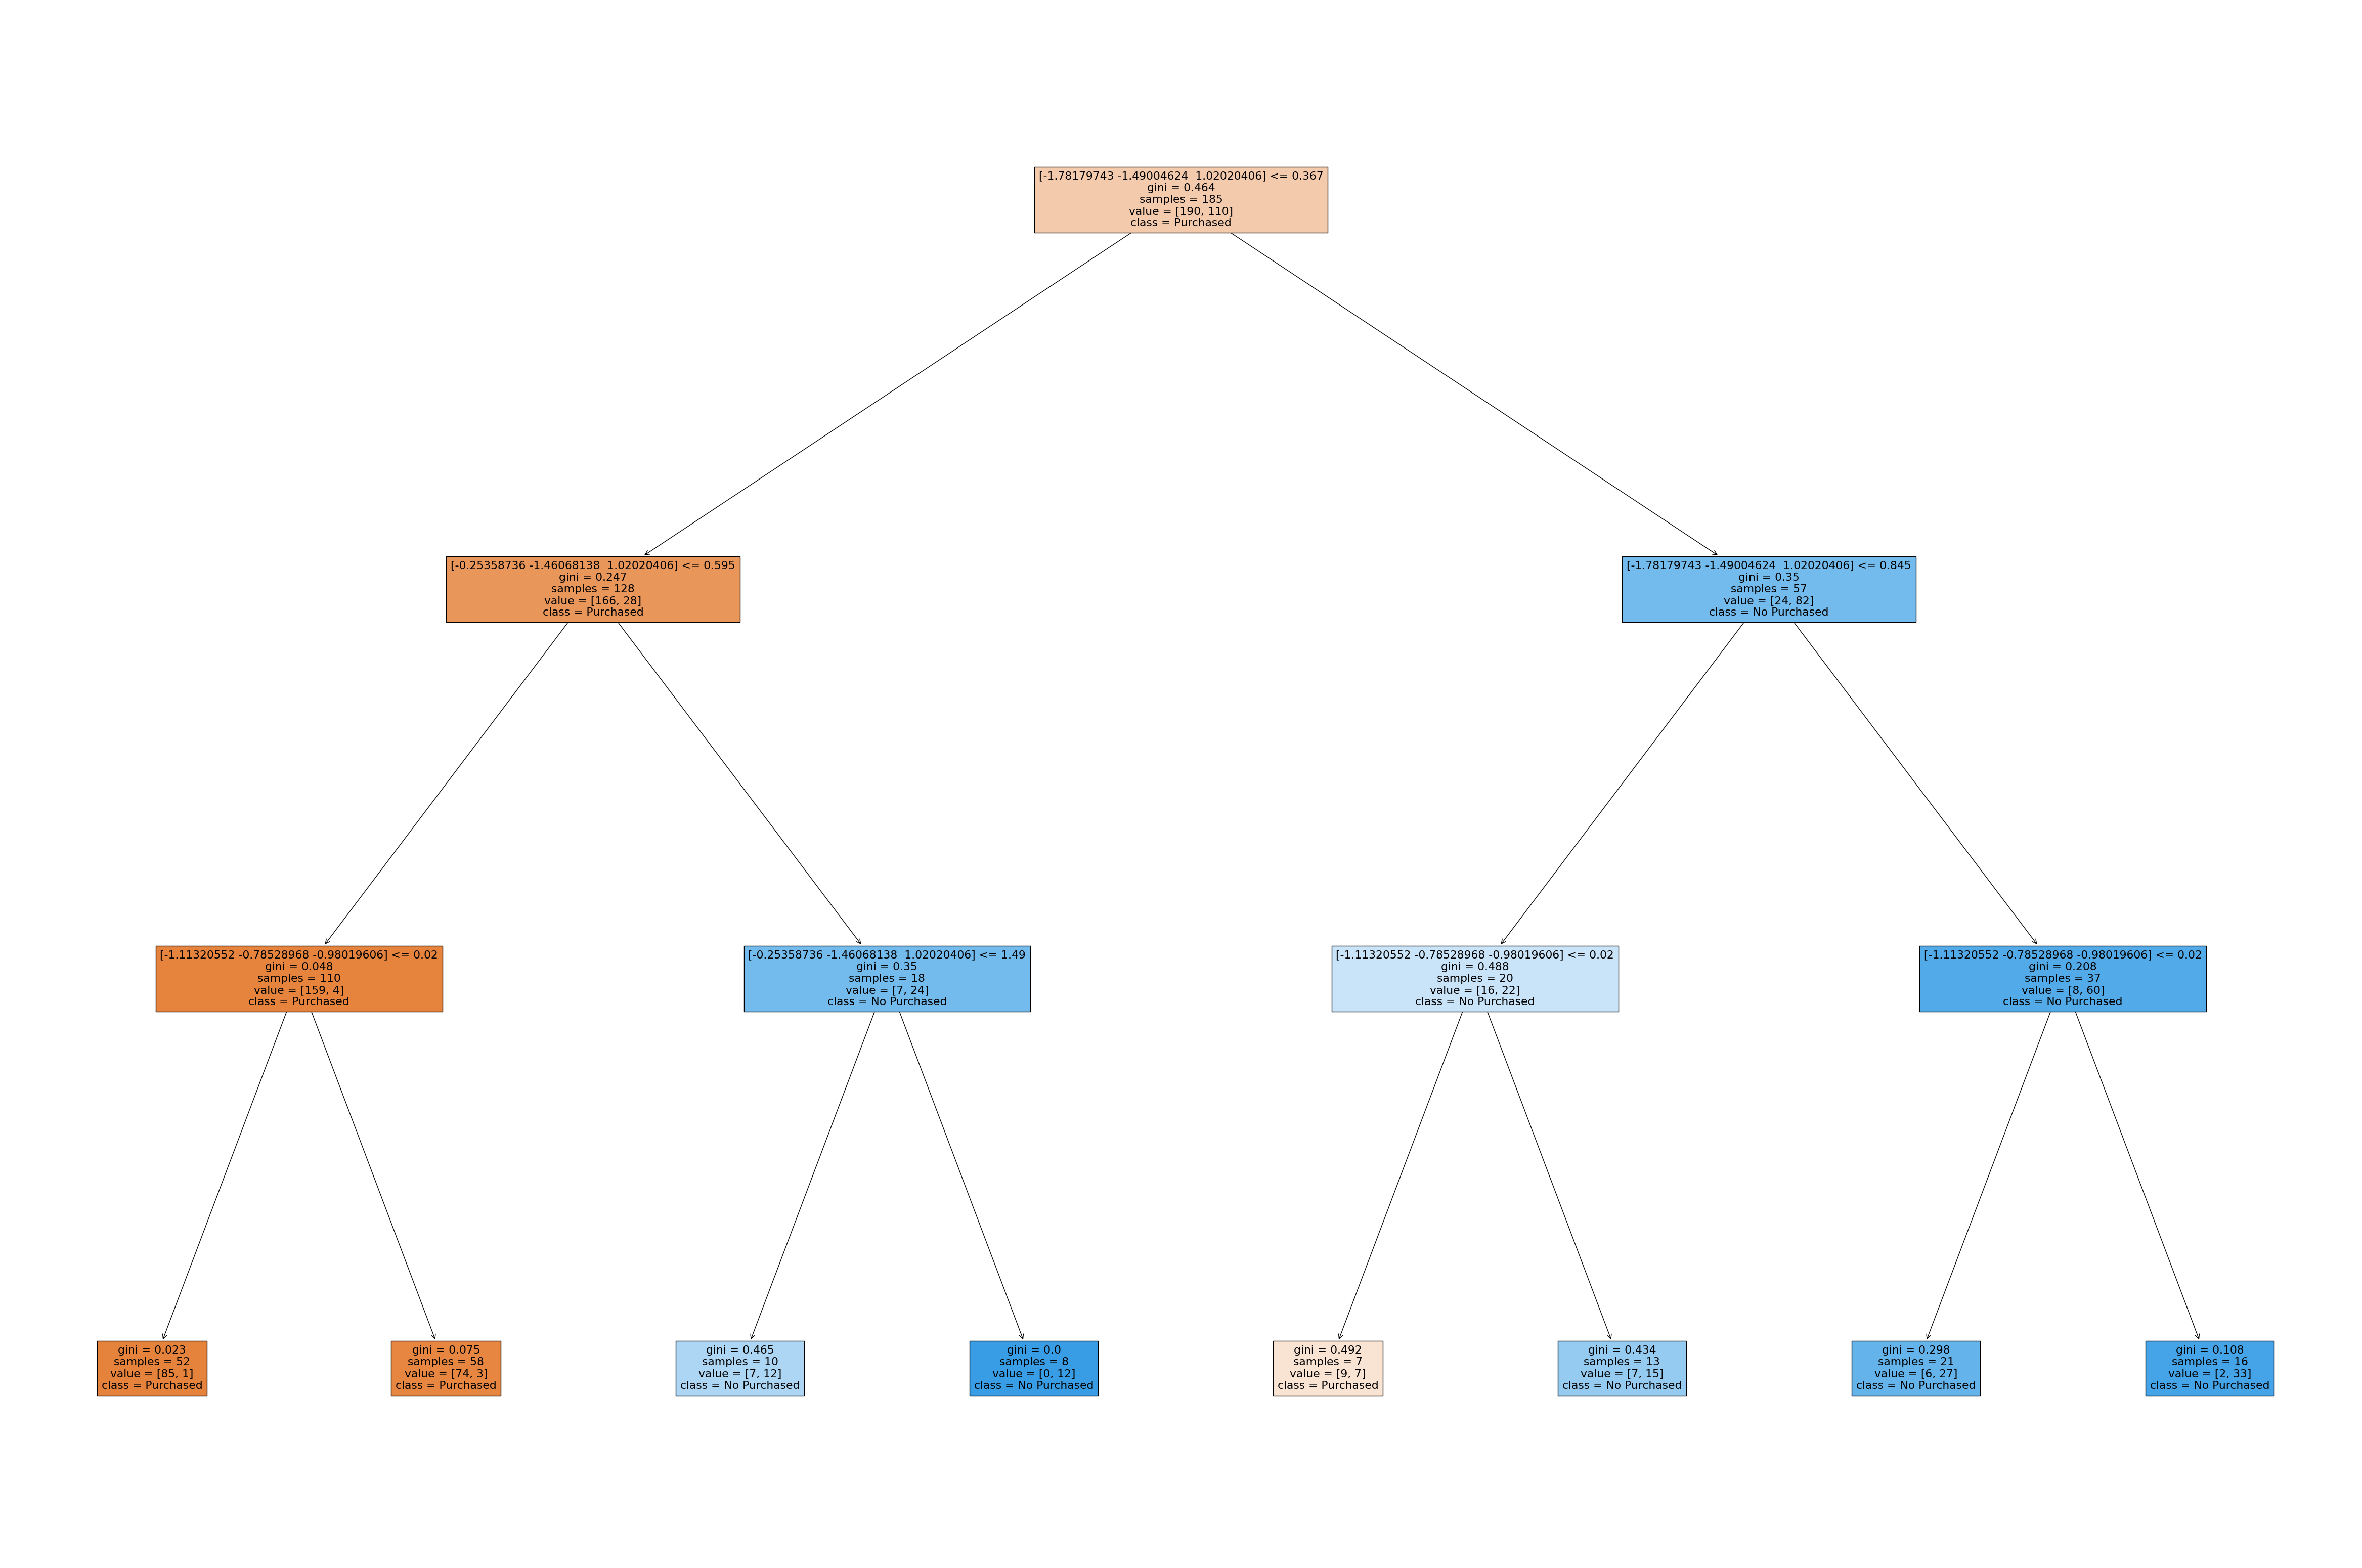

In [33]:
from sklearn import tree
plt.figure(figsize=(60,40))
tree.plot_tree(b.estimators_[7],feature_names=x,class_names = ['Purchased' , 'No Purchased'],filled=True)


### feature importance

In [35]:
b.feature_importances_

array([0.53790461, 0.4536819 , 0.00841349])

In [36]:
imp_df = pd.DataFrame({
    'feature' : ['Age','Salary','Gender'] , 
    'imp' : b.feature_importances_
})

imp_df.sort_values(by='imp',ascending=False)

,feature,imp
0,Age,0.537905
1,Salary,0.453682
2,Gender,0.008413
